In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context # ssl 认证
from sklearn.datasets import fetch_lfw_people  # 下载数据集
faces = fetch_lfw_people(min_faces_per_person=60)

In [7]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']
(1277, 62, 47)


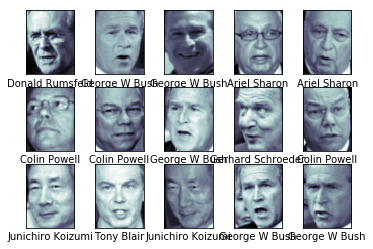

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap="bone")
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

* 每个图的大小为 [62 * 47]
* 在这里我们就把每一个像素点当成一个特征，但是这样的特征太多了，用PCA进行降维

In [9]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

#将维度降成150维
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel="rbf", class_weight="balanced")
model = make_pipeline(pca, svc)

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=40)

### 使用grid search cross-validation 来选择我们的参数

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'svc__C':[1, 5, 10],
    'svc__gamma':[0.0001, 0.0005,0.001]
}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 17.1 s, sys: 790 ms, total: 17.9 s
Wall time: 13.9 s
{'svc__C': 5, 'svc__gamma': 0.0005}


In [13]:
model = grid.best_estimator_
yfit = model.predict(Xtest)
yfit.shape

(320,)

Text(0.5,0.98,'predicted names: Incorrect Labels in Red')

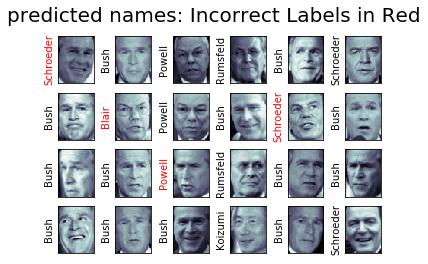

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color="black" if yfit[i] == ytest[i] else "red")
fig.suptitle("predicted names: Incorrect Labels in Red", size=20)

In [17]:
# 对于每个人来看，查看其精度
from sklearn.metrics import classification_report
print(classification_report(ytest,yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.81      0.71      0.76        24
     Colin Powell       0.71      0.81      0.76        54
  Donald Rumsfeld       0.75      0.80      0.77        30
    George W Bush       0.91      0.83      0.87       119
Gerhard Schroeder       0.78      0.91      0.84        34
Junichiro Koizumi       0.86      0.86      0.86        14
       Tony Blair       0.86      0.80      0.83        45

      avg / total       0.83      0.82      0.82       320



* 精度（precision）= 正确预测的个数（TP）/ 被预测正确的个数（TP+FP）
* 召回率（recall）= 正确预测的个数（TP）/ 预测个数（TP + FN）
* F1 = 2 * 精度召回率 /（精度 + 召回率）

Text(0.5,16,'predicted label')

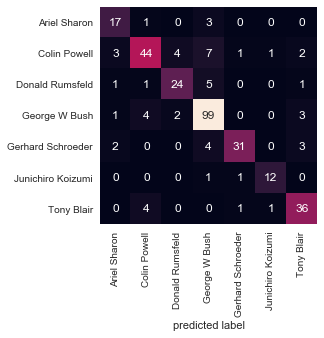

In [20]:
import seaborn as sns;sns.set()
from sklearn.metrics import confusion_matrix # 混淆矩阵
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
           cbar=False, xticklabels=faces.target_names,
           yticklabels=faces.target_names)
plt.xlabel('true label')
plt.xlabel('predicted label')